# Practicum: Regularized Logistic Regression and ROC

## Part 1: Data Exploration: Graduate School Admissions

The data we will be using is admission data on Grad school acceptances.

* `admit`: whether or not the applicant was admitted to grad school
* `gpa`: undergraduate GPA
* `GRE`: score of GRE test
* `rank`: prestige of undergraduate school (1 is highest prestige)

We will use the GPA, GRE, and rank of the applicants to try to predict whether or not they will be accepted into graduate school.

Before we get to predictions, we should do some data exploration.

**1)** Load the dataset into pandas: `data/grad.csv`.  


**2)** Use the pandas `describe` method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.  


**3)** Use the pandas `crosstab` method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this:

    ```
    rank    1   2   3   4
    admit
    0      28  ..  ..  ..
    1      33  ..  ..  ..
    ```


**4)** Make a bar plot of the percent of applicants from each rank who were accepted. You can do `.plot(kind="bar")` on a pandas dataframe.  
    

**5)** What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

    Hint: Use the pandas `hist` method.  
    

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
grad_df = pd.read_csv('data/grad.csv')

1) Load the dataset into pandas: data/grad.csv.

2) Use the pandas describe method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.


In [3]:
grad_df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


3) Use the pandas crosstab method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this

In [24]:
pd.crosstab(grad_df['admit'],grad_df['rank'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


4) Make a bar plot of the percent of applicants from each rank who were accepted. You can do .plot(kind="bar") on a pandas dataframe.

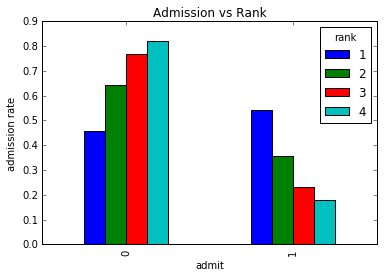

In [27]:
pd.crosstab(grad_df['admit'],grad_df['rank']).apply(lambda x:x/sum(x)).plot(kind='bar')
plt.ylabel('admission rate')
plt.title('Admission vs Rank')

## Part 2: Regularized Logistic Regression

Now we're ready to try to fit our data with Regularized Logistic Regression.  

In this part, we will use the gradient descent algorithm to estimate the logistic regression coefficients. 

The hypothesis function of the logistic regression is defined as, 

$$ h(x_i) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3})}} $$


**1)** In `code/regularized_logistic_regression.py`, implement `hypothesis` and `predict` functions. `hypothesis` will calculate the value of the hypothesis function for the given coefficients. (Remember to add a column of 1's to the feature meatrix.) This returns float values between 0 and 1. `predict` will round these values so that you get a prediction of either 0 or 1. You can assume that the threshold we're using is 0.5.  

In [28]:
from math import e

In [139]:
p = np.array([1.4,2.1,3.5,4.5])

In [154]:
r = np.array([[random.choice(2,9)]]).reshape(3,3)
r

array([[1, 0, 1],
       [1, 0, 0],
       [0, 0, 0]])

In [83]:
r[0,:]*np.array([1,1,2])

array([ 6,  1, 10])

In [58]:
np.concatenate( (r,np.ones(len(r))), axis=1)

ValueError: all the input arrays must have same number of dimensions

In [157]:
np.zeros(len(r))

array([ 0.,  0.,  0.])

In [155]:
np.std(r,axis=0)

array([ 0.47140452,  0.        ,  0.47140452])

In [141]:
def hypothesis( X, coeffs):
        '''
        INPUT: 2 dimensional numpy array, numpy array
        OUTPUT: numpy array

        Calculate the predicted percentages (floats between 0 and 1)
        for the given data with the given coefficients.
        '''

        # * The hypothesis function is going to return a proposed probability for each of the test data points
        # * this will be done using the logistic function and the coefficients you've derived from the gradient descent
        X = np.column_stack([np.ones(len(X)).reshape(len(X),1),X]) ## add in the coefficient term
        print(X[:,0])



        hypothesis = []
#         for row_index,row in enumerate(X):
        return   float(1/(1+np.exp(-(np.dot(X,coeffs)))))


The cost function without regularization is given by  

$$ J(\beta) = - \frac{1}{n} \sum_{i = 1}^{n} \left[ y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)) \right] $$  

With Ridge regularization, the cost function becomes  

$$ J(\beta) = - \frac{1}{n} \sum_{i = 1}^{n} \left[ y_i log(h(x_i)) + (1 - y_i) log(1 - h(x_i)) \right] + \frac{\lambda}{2n} \sum_{j = 1}^{p} \beta_j^2$$  

**2)** In `regularized_logistic_regression.py`, implement `cost_function` (without regularization) and `cost_regularized` (with regularization) functions. You should be able to use the `hypothesis` function you implemented above.  


The gradient of the cost function without regularization is given by  

$$ \frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) x_{ij}$$  

where $j = 0, 1, 2, 3$ and $x_{i0} = 1$ for all $i$ (the column of 1's in the feature matrix).  


With regularization, the gradient is  

$$ \frac{\partial}{\partial \beta_0} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) \text{ when } j = 0$$  

and  

$$ \frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{n} \sum_{i=1}^{n} \left( h(x_i) - y_i \right) x_{ij} + \frac{\lambda}{n} \beta_j \text{ for } j = 1, 2, 3$$



**3)** In `regularized_logistic_regression.py`, implement `cost_gradient` (without regularization) and `gradient_regularized` (with regularization) functions. 


Now we are going to implement gradient descent. Below is psuedocode for the gradient descent algorithm. In this pseudocode and in our implementation, we will stop after a given number of iterations. Another valid approach is to stop once the incremental improvement in the optimization function (the cost function) is sufficiently small.

    Gradient Descent:
        input: J: optimization function (cost function)
               alpha: learning rate
               n: number of iterations
        output: local minimum of optimization function J

        initialize b (often as all 0's)
        repeat for n iterations:
            update b as b - alpha * gradient(J)

You are going to be completing the code stub in `gradient_descent.py`.

**4)** Start by taking a look at the starter code. Note how the `GradientDescent` object is initialized. It takes a cost function and a gradient function. We will pass it the functions that we wrote above. Here's example code of how we'll be able to run the Gradient Descent code.

    ```python
    from regularized_logistic_regression import cost_regularized, gradient_regularized
    gd = GradientDescent(cost_regularized, gradient_regularized, predict)
    gd.run(X, y)
    print "coeffs:", gd.coeffs
    predictions = gd.predict(X)
    ```



**5)** Implement the `run` method. Follow the pseudocode from above.  


**6)** Implement the `predict` method. It should just call the `predict` function that was taken as a parameter.  


**7)** Run your version of gradient descent on the admission data.

    **Note:** If you're having trouble getting it to converge, run it for just
    a few iterations and print out the cost at each iteration. The value should
    be going down. If it isn't, you might need to decrease your learning rate.
    And of course check your implementation to make sure it's correct. You can
    also try printing out the cost every 100 iterations if you want to run it
    longer and not get an insane amount of printing.



In [ ]:
! python 

In [158]:
import numpy as np

__author__ = "Jonathan Hilgart"


class GradientDescent(object):
    def __init__(self, fit_intercept=True, normalize=False, gradient=None, mu=None, sigma=None):
        '''
        INPUT: GradientDescent, boolean
        OUTPUT: None
        Initialize class variables. cost is the function used to compute the
        cost.
        '''

        # * initialize and store None to the local copy of coefficients (weights) and alpha (input in the run function)
        # * store boolean values for fit_intercept and normalize
        # * store local copies of gradient, mu and sigma
        self.coeffs=None
        self.alpha=None
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.gradient = gradient
        self.mu = mu
        self.sigma = sigma




    def run(self, X, y, coeffs=None, alpha=0.01, num_iterations=100):


        # * calculate normalization factors
        calculate_normalization_factors(X)
        # * run maybe_modify_matrix here and return the modified matrix

        X= maybe_modify_matrix(X)

        # * update the local copies of coefficents and alpha

        

        # * if there aren't input coefficients, initialize them to zero.
        if coeffs ==None:
            self.coeffs=np.zeros(len(X))
        # * Recall that there should be as many coefficients as features.

        # I give you this line here. if fit_intercept = True, set the intercept to 0
        if self.fit_intercept:
            self.coeffs = np.insert(self.coeffs, 0, 0)

        # * for each of the num_iterations, update self.coeffs at each step.

        for n in range(num_iterations):
            #update b as b - alpha * gradient(J)
            self.coeffs = self.coeffs- alpha*self.gradient(X,self.coeffs)


    def calculate_normalization_factors(self, X):
        '''
        INPUT: GradientDescent, 2 dimensional numpy array
        OUTPUT: None
        Initialize mu and sigma instance variables to be the numpy arrays
        containing the mean and standard deviation for each column of X.
        '''

        # * set the local copy of mu to be the average of each column of X
        self.mu=np.mean(X,axis=0)

        # * set the local copy of sigma to be the standard deviation of each column of X
        self.sigma=np.std(X,axis=0)

        # I give this to you - Don't normalize the intercept column
        self.mu[self.sigma == 0] = 0
        self.sigma[self.sigma == 0] = 1

    def add_intercept(self, X):
        '''
        INPUT: 2 dimensional numpy array
        OUTPUT: 2 dimensional numpy array
        Return a new 2d array with a column of ones added as the first
        column of X.
        '''
        # I give this line to you
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def maybe_modify_matrix(self, X):
        '''
        INPUT: GradientDescent, 2 dimensional numpy array
        OUTPUT: 2 dimensional numpy array
        Depending on the settings, normalizes X and adds a feature for the
        intercept.
        '''
        # I give this line to you

        if self.normalize:
            X = (X - self.mu) / self.sigma

        if self.fit_intercept:
            return self.add_intercept(X)

        return X

In [163]:
import numpy as np
#from gradient_descent import GradientDescent
from math import e

__author__ = "Jonathan Hilgart"

class LogisticRegression(object):

    def __init__(self, fit_intercept = True, scale = True, norm = "L2"):
        '''
        INPUT: GradientDescent, function, function, function
        OUTPUT: None

        Initialize class variables. Takes three functions:
        cost: the cost function to be minimized
        gradient: function to calculate the gradient of the cost function
        predict: function to calculate the predicted values (0 or 1) for
        the given data
        '''

        self.cost_gradient_lasso = None
        self.cost_gradient_ride = None

        gradient_choices = {None: self.cost_gradient, "L1": self.cost_gradient_lasso, "L2": self.cost_gradient_ridge}


        # * You'll need to initialize alpha, gama, and the weights (coefficients for the regression)
        self.coeffs = None
        self.alpha = None
        self.gamma = None

        # * You'll also need to store the number of iterations
        
        

        # * You'll also need to store a boolean value for whether or
        # * not you fit the intercept and scale

        # I give these lines to you
        if norm:
            self.norm = norm
            self.normalize = True
        self.gradient = gradient_choices[norm]

    def fit(self,  X, y, alpha=0.01, num_iterations=10000, gamma=0.1):
        '''
        INPUT: 2 dimensional numpy array, numpy array, float, int, float
        OUTPUT: numpy array

        Main routine to train the model coefficients to the data
        the given coefficients.
        '''

        # * You'll need to store the dimensions of the input here
        shape = np.shape(X)
        
        # * You'll also need to store the inputs for
        # * alpha (the lagrange multiplier) and gamma
        alpha = alpha
        gamma =gamma

        # * you'll need to update the stored value of num_iterations
        
        

        # * randomly initialize the regression weights
        
        # start with zeros
        self.coeffs = np.zeros(np.shape(X)[1])

        # * Create an instance of GradientDescent
        
    
        # * Run gradient descent

        # * store the coefficients obtained from the gradient descent




    def predict(self, X):
        '''
        INPUT: 2 dimensional numpy array, numpy array
        OUTPUT: numpy array

        Calculate the predicted values (0 or 1) for the given data with
        the given coefficients.
        '''

        # * The hypothesis function wil predict probabilities (floats between 0 and 1) for each input.

        # * you will need to be able to return a set of values between 0 and 1 for each of these.

        # * return a bool (t/f) value for each percentage, such that percentages above 0.5 are
        # * returned as 1, else 0.
    
        threshold = .5
        bool_t = hypothesis(self, X, self.coeffs)>threshold 
        bool_f = [1 for i in bool_t if i == True ]
        return bool_f



    def hypothesis( X, coeffs):
        '''
        INPUT: 2 dimensional numpy array, numpy array
        OUTPUT: numpy array

        Calculate the predicted percentages (floats between 0 and 1)
        for the given data with the given coefficients.
        '''

        # * The hypothesis function is going to return a proposed probability for each of the test data points
        # * this will be done using the logistic function and the coefficients you've derived from the gradient descent


#         for row_index,row in enumerate(X):
        return   float(1/(1+np.exp(-(coeffs[0]+np.dot(X,coeffs[1:].T)))))



    def cost_function(self, X, y, coeffs):
        '''
        INPUT: 2 dimensional numpy array, numpy array, numpy array
        OUTPUT: float

        Calculate the value of the cost function for the data with the
        given coefficients.
        '''

        # * call the hypothesis function to return a set of probabilities into a single vector h

        # * return the log-likelihood for each of these predictions  1/M sum y_i*h_i + (1-y_i)*(1-h_i)
        # * using the dot product will help


        h = hypothesis(X,coeffs)

        length = len(X)
        log_likelihood = []

        cost = [(-1/len(X))*sum(y*(log(h)) + (1-y)*(1-h))]

        return cost


    def cost_gradient(self, X, y, coeffs):
        '''
        INPUT: 2 dimensional numpy array, numpy array, numpy array
        OUTPUT: numpy array

        Calculate the gradient of the cost function at the given value
        for the coeffs.

        Return an array of the same size as the coeffs array.
        '''

        # This function is not used in the above code, just kept here for measuring the current state of cost

        # * Calculate the hypothesis function with the input coefficients

        # * Return Sum x_i*(y_i - h_i)
        h = hypothesis(X,coeffs)

        return [(1/len(X)) * sum(((h-y))*(X))]







In [164]:
logistic = LogisticRegression()

AttributeError: 'LogisticRegression' object has no attribute 'cost_gradient_ridge'

## Part 3: ROC Curve 

One of the best ways to evaluate how a classifier performs is an ROC curve. (http://en.wikipedia.org/wiki/Receiver_operating_characteristic) 

![](images/roc_curve.png)

To understand what is actually happening with an ROC curve, we can create one ourselves.  Here is pseudocode to plot it.

The `probabilities` are the predicted probabilities in (0,1) returned from Logistic Regression. The standard default threshold is 0.5 where 
0-0.5 values are interpreted as the negative class ($y = 0$) and 0.5-1 values are predicted as the positive class ($y = 1$).

The `labels` are the true/observed values of $y$.

```
function ROC_curve(probabilities, labels):
    Sort instances by their prediction strength (the probabilities)
    For every instance in increasing order of probability:
        Set the threshold to be the probability
        Set everything above the threshold to the positive class
        Calculate the True Positive Rate (aka sensitivity or recall)
        Calculate the False Positive Rate (1 - specificity)
    Return three lists: TPRs, FPRs, thresholds
```

Recall that the *true positive rate* is

```
 number of true positives     number correctly predicted positive
-------------------------- = -------------------------------------
 number of positive cases           number of positive cases
```

and the *false positive rate* is

```
 number of false positives     number incorrectly predicted positive
--------------------------- = ---------------------------------------
  number of negative cases           number of negative cases
```

You're going to be implementing the `roc_curve` function.

Here's some example code that you should be able to use to plot the ROC curve with your function. This uses a fake dataset.

```python
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()
```

**1)** Write an ROC curve function to compute the above in `roc_curve.py`.

    It should take as input the predicted probabilities and the true labels.

**2)** Run the above code to verify that it's working correctly. You can also validate your correctness against [scikit-learns built-in function](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

**3)** Make a plot of the ROC curve for the regularized logistic regression model from Part 2.  

**4)** Is it possible to pick a threshold where TPR > 60% and FPR < 40%? What is the threshold?

    Note that even if it appears to be in the middle of the graph it doesn't make the threshold 0.5.

**5)** Say we are using this as a first step in the admission process. We want to weed out clearly unqualified candidates, but not reject too many candidates. What might be a good choice of threshold?

    There isn't a single correct answer, so explain your choice.